In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(
    n_samples=1000,   # number of rows
    n_features=2,
    n_redundant=0,     # no redundant features
    n_informative=2,   # both are useful# total features
    n_classes=2,      # binary classification
    random_state=42
)

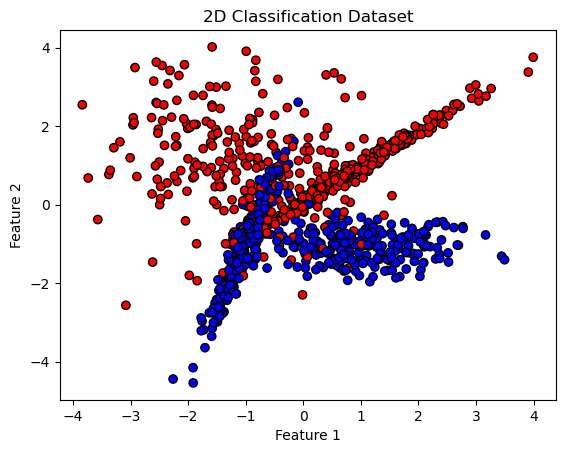

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("2D Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [35]:
class perceptron:
    def __init__(self, lr):
        self.lr = lr
        self.weights = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis = 1)
        self.weights = np.ones(X.shape[1])

        for i in range(10000):
            j = np.random.randint(0, X.shape[0])
            y_hat = step(np.dot(X[j], self.weights))
            self.weights = self.weights + self.lr*(y[j]-y_hat)*X[j]

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        predictions = [step(np.dot(x, self.weights)) for x in X]
        return np.array(predictions)

In [36]:
def step(n):
    return 1 if n>0 else 0

In [37]:
pr = perceptron(lr = 0.1)

In [38]:
pr.fit(X_train, y_train)

In [39]:
pr.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1])

In [40]:
y_pred = pr.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.885

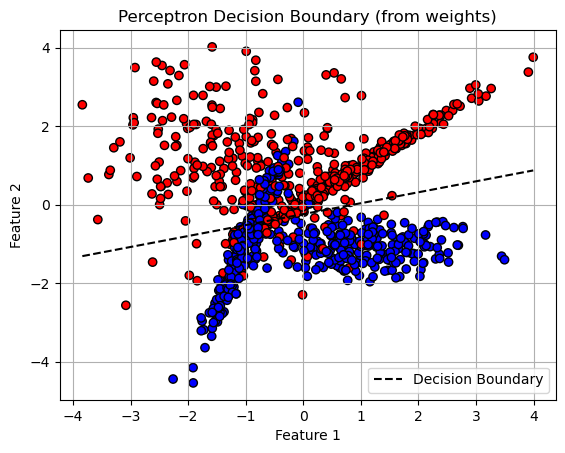

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Plot decision boundary using weights
w0, w1, w2 = pr.weights
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w0 + w1 * x_vals) / w2

plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Perceptron Decision Boundary (from weights)")
plt.grid(True)
plt.show()
